In [61]:
import sympy as sp
from matplotlib import pyplot as plt
import seaborn as sns

### Initialize options

In [62]:
x,y,Q=sp.symbols('x y Q')
sp.init_printing()
# %matplotlib inline
sns.set_style('white')
sns.set_context('poster')

## Difference between integrating Gauss over grid points and erf()

In [34]:
sigma,delta  = sp.symbols('sigma Delta')
gauss = lambda x: (1/sp.sqrt(2*sp.pi)) * sp.exp(-(x**2/(2)))
integrated = lambda x: sp.integrate(gauss(y),y).subs(y,x)

absolutedifference = gauss(x) * delta -  (integrated(x+delta/2.) - integrated(x-delta/2.))
relativedifference = (gauss(x) * delta) / (integrated(x+delta/2.) - integrated(x-delta/2.))-1
differenceDerivative = sp.diff(relativedifference,x).refine(sp.Q.real((x,delta)))

### Difference for constant grid spacing at different x

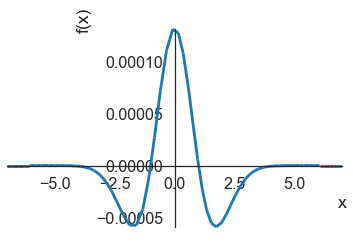

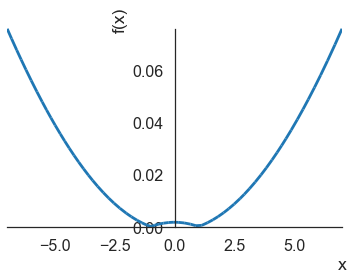

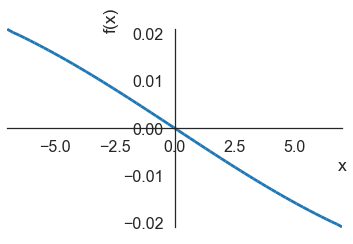

In [35]:


currentDelta = 0.2
plotRange = (x,-7,7)

sp.plot(absolutedifference.subs(delta, currentDelta),plotRange)
sp.plot(abs(relativedifference.subs(delta,currentDelta)),plotRange)
sp.plot(differenceDerivative.subs(delta,currentDelta),plotRange)

### Relative error at different function points over grid spacing

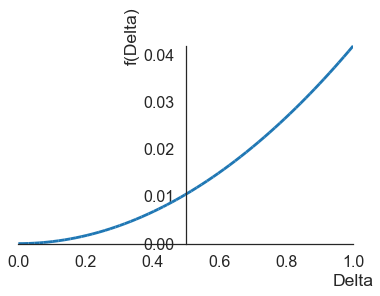

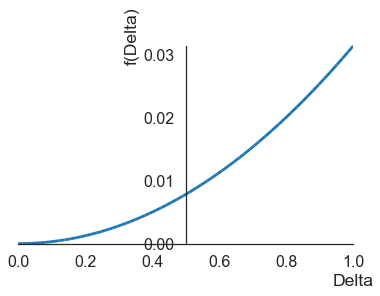

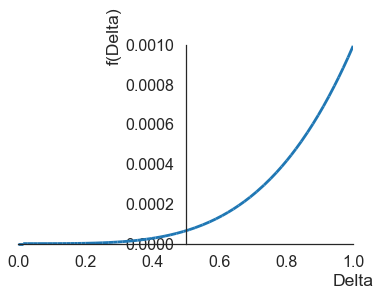

In [36]:
#relative error
spacingRange = (delta,0.0001,1)
sp.plot(((gauss(x)*delta) /(integrated(x+delta/2) - integrated(x-delta/2))-1).subs(x,0),spacingRange)
sp.plot(((gauss(x)*delta) /(integrated(x+delta/2) - integrated(x-delta/2))-1).subs(x,0.5),spacingRange)
sp.plot(((gauss(x)*delta) /(integrated(x+delta/2) - integrated(x-delta/2))-1).subs(x,1),spacingRange)

## Missing contribution to Gauss integral due to truncation of integration range

Integrate three dimensional Gaussian function in radial coordinates up to $u$
$$
    \int_0^{2 \pi}\int_0^{\pi}\int_0^{u} \cfrac{1}{\sqrt{2 \pi}^3\sigma^3}\exp{\left(-\frac{r^2}{2\sigma^2}\right)}r^2\sin{\theta}\mathrm{d}r\mathrm{d}\theta\mathrm{d}\phi
$$

In [37]:
r,theta,phi,sigma=sp.symbols('r theta phi sigma')
ru=sp.symbols('u')

In [38]:
gaussprefactor = 1/(sp.sqrt(2*sp.pi)**3 * sigma **3)
thetaintegral = 2
phiintegral = 2 * sp.pi
rintegral = sp.integrate(r * r * sp.exp(
    -r * r / (2 * sigma**2)), (r, 0, ru))

result = thetaintegral * phiintegral * gaussprefactor * rintegral

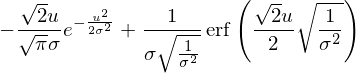

In [39]:
result.simplify()

In [40]:
# express u in multiples of sigma which is effectivly achieved by 
usigma = result.subs(sigma,1).simplify()
# because we have only the term u/sigma in above equation 

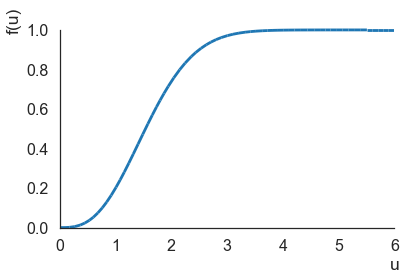

In [41]:
#fraction of total density covered by integration until nSigma
nSigma = 6
sp.plot(usigma, (ru,0,nSigma))

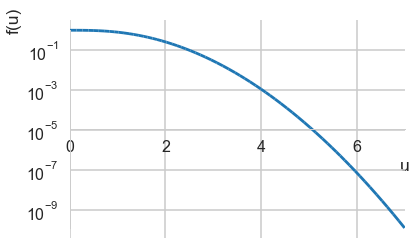

In [42]:
sns.set_style('whitegrid')
p=sp.plot(1-usigma, (ru,0,7),yscale='log', show=False)
p.show()
# p.save_fig('out.svg')
# plt.show()

In [43]:
print("nSigma\tMissing Part")
for nSigma in range(7):
    print("{:g}\t{:6.2e}".format(nSigma, sp.N(1-usigma.subs(ru,nSigma))))

nSigma	Missing Part
0	1.00e+0
1	8.01e-1
2	2.61e-1
3	2.93e-2
4	1.13e-3
5	1.54e-5
6	7.49e-8


## Derivative of goodness-of-fit

### Cross correlation

$$
\begin{align}
\mathrm{cc}&=\cfrac{\sum_i \left(\rho^e_i - \langle \rho^e \rangle\right) \left(\rho^s_i - \langle \rho^s \rangle\right) }{ \sqrt{\sum_i \left(\rho^e_i - \langle \rho^e \rangle\right)^2} \sqrt{\sum_i \left(\rho^s_i - \langle \rho^s \rangle\right)^2 }} \\
\rho_i^{0} &= \cfrac{\rho_i - \langle \rho \rangle}{\sqrt{\sum_i \left(\rho_i - \langle \rho \rangle\right)^2}}\\
&=\left(\rho_i - \langle \rho \rangle\right)s^{-\frac{1}{2}}\\
s&= \sum_i \left(\rho_i^s - \langle \rho^s \rangle\right)^2 \\
\partial_{\rho_j^s}{s}&= \sum_i 2 \left(\rho_i^s - \langle \rho^s \rangle\right)  \left(\delta_{ij} - 1/N\right)\\
&=2 \left(\rho_j^s - \langle \rho^s \rangle\right) - 2 \sum_i\frac{1}{N} \left(\rho_i^s - \langle \rho^s \rangle\right)\\
&=2\left[\left(\rho_j^s - \langle \rho^s \rangle\right) - \langle \rho^s \rangle + \langle \rho^s \rangle\right]\\
&=2\left(\rho_j^s - \langle \rho^s \rangle\right)\\
\mathrm{cc}&=\sum_i \rho_i^{e0} \rho_i^{s0} \\
\partial_{\rho_j^s} \mathrm{cc} &= \partial_{\rho_j^{s0}} \left(\sum_i \rho_i^{e0} \rho_i^{s0}\right) \partial_{\rho_j^s} \rho_j^{s0}\\
&= \rho_i^{e0}  \partial_{\rho_i^{s}}\left(\rho_i^s - \langle \rho_i \rangle\right) s(\rho_i^s)^{-\frac{1}{2}}\\
&= \rho_i^{e0} (1-1/N) \partial_{\rho_i^{s}}s(\rho_i^s)^{-\frac{1}{2}}\\
&= \rho_i^{e0} (1-1/N) (-1/2) s^{-\frac{3}{2}} 2\left(\rho_j^s - \langle \rho^s \rangle\right)\\
&= \rho_i^{e0} (1/N-1) s^{-\frac{3}{2}} \left(\rho_j^s - \langle \rho^s \rangle\right)\\
&= \rho_i^{e0} \rho_j^{s0} (1/N-1) s^{-1} 
\end{align}
$$

## Derivative of Gaussian / integrated Gaussian wrt to coordinate

In [49]:
xAtom = sp.symbols('x_A')
xp = sp.symbols('x^+')
xm = sp.symbols('x^-')
yAtom = sp.symbols('y_A')
yp = sp.symbols('y^+')
ym = sp.symbols('y^-')
zAtom = sp.symbols('z_A')
zp = sp.symbols('z^+')
zm = sp.symbols('z^-')

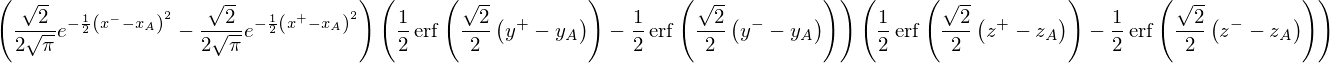

In [51]:
sp.diff(integrated(xp - xAtom) - integrated(xm - xAtom),
        xAtom) * (integrated(yp - yAtom) - integrated(ym - yAtom)) * (integrated(
            zp - zAtom) - integrated(zm - zAtom)).simplify()

## Electrostatic Potential

### Potential of a Sphere

In [5]:
q,r,R = sp.symbols('q,r,R')

In [54]:
outside = q/r
inside = (q/R - q/(2*R**3)*(r**2-R**2)).simplify()
atzero = sp.limit(inside,r,0)
potential = sp.Piecewise((atzero,r==0),(inside,r<R),(outside,r>=R))
simplepotential = potential.subs(R,1).subs(q,1)

In [56]:
atzero

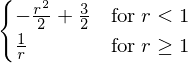

In [55]:
simplepotential

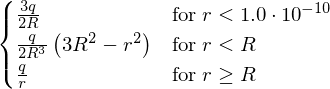

In [46]:
potential

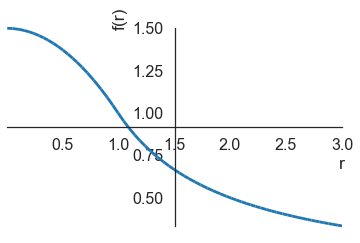

In [64]:
sp.plot(simplepotential,(r,0.01,3))

Average electrostatic potential inside sphere

In [69]:
sphereVolume = 4*sp.pi*R**3 / 3
sp.integrate(inside*r**2*4*sp.pi/sphereVolume, (r,0,R))

In [80]:
sp.N(sp.limit(sp.erf(r),r,0),4)

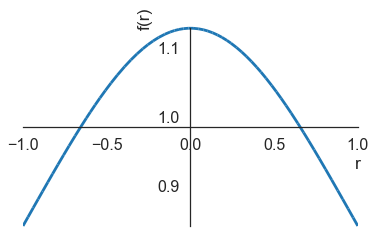

In [73]:
sp.plot((1/r)*sp.erf(r),(r,-1,1))